<a href="https://colab.research.google.com/github/Raju2004-chenchu/2303a52206_AIML/blob/main/AIML_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
d=pd.read_csv('/content/car data.csv')
d.dropna()
print(d)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [2]:
d['Fuel_Type']=d['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
d['Transmission']=d['Transmission'].map({'Manual':0,'Automatic':1})
d['Selling_type']=d['Selling_type'].map({'Dealer':0,'Individual':1})
d.dropna()
print(d)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Selling_type  Transmission  Owner  
0               0             0      0  
1               0

In [3]:
x=d.drop(['Car_Name','Fuel_Type'],axis=1)
x.dropna()
print(x)

     Year  Selling_Price  Present_Price  Driven_kms  Selling_type  \
0    2014           3.35           5.59       27000             0   
1    2013           4.75           9.54       43000             0   
2    2017           7.25           9.85        6900             0   
3    2011           2.85           4.15        5200             0   
4    2014           4.60           6.87       42450             0   
..    ...            ...            ...         ...           ...   
296  2016           9.50          11.60       33988             0   
297  2015           4.00           5.90       60000             0   
298  2009           3.35          11.00       87934             0   
299  2017          11.50          12.50        9000             0   
300  2016           5.30           5.90        5464             0   

     Transmission  Owner  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4               0      0  
..       

In [4]:
y=d['Fuel_Type']
y.dropna()
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64


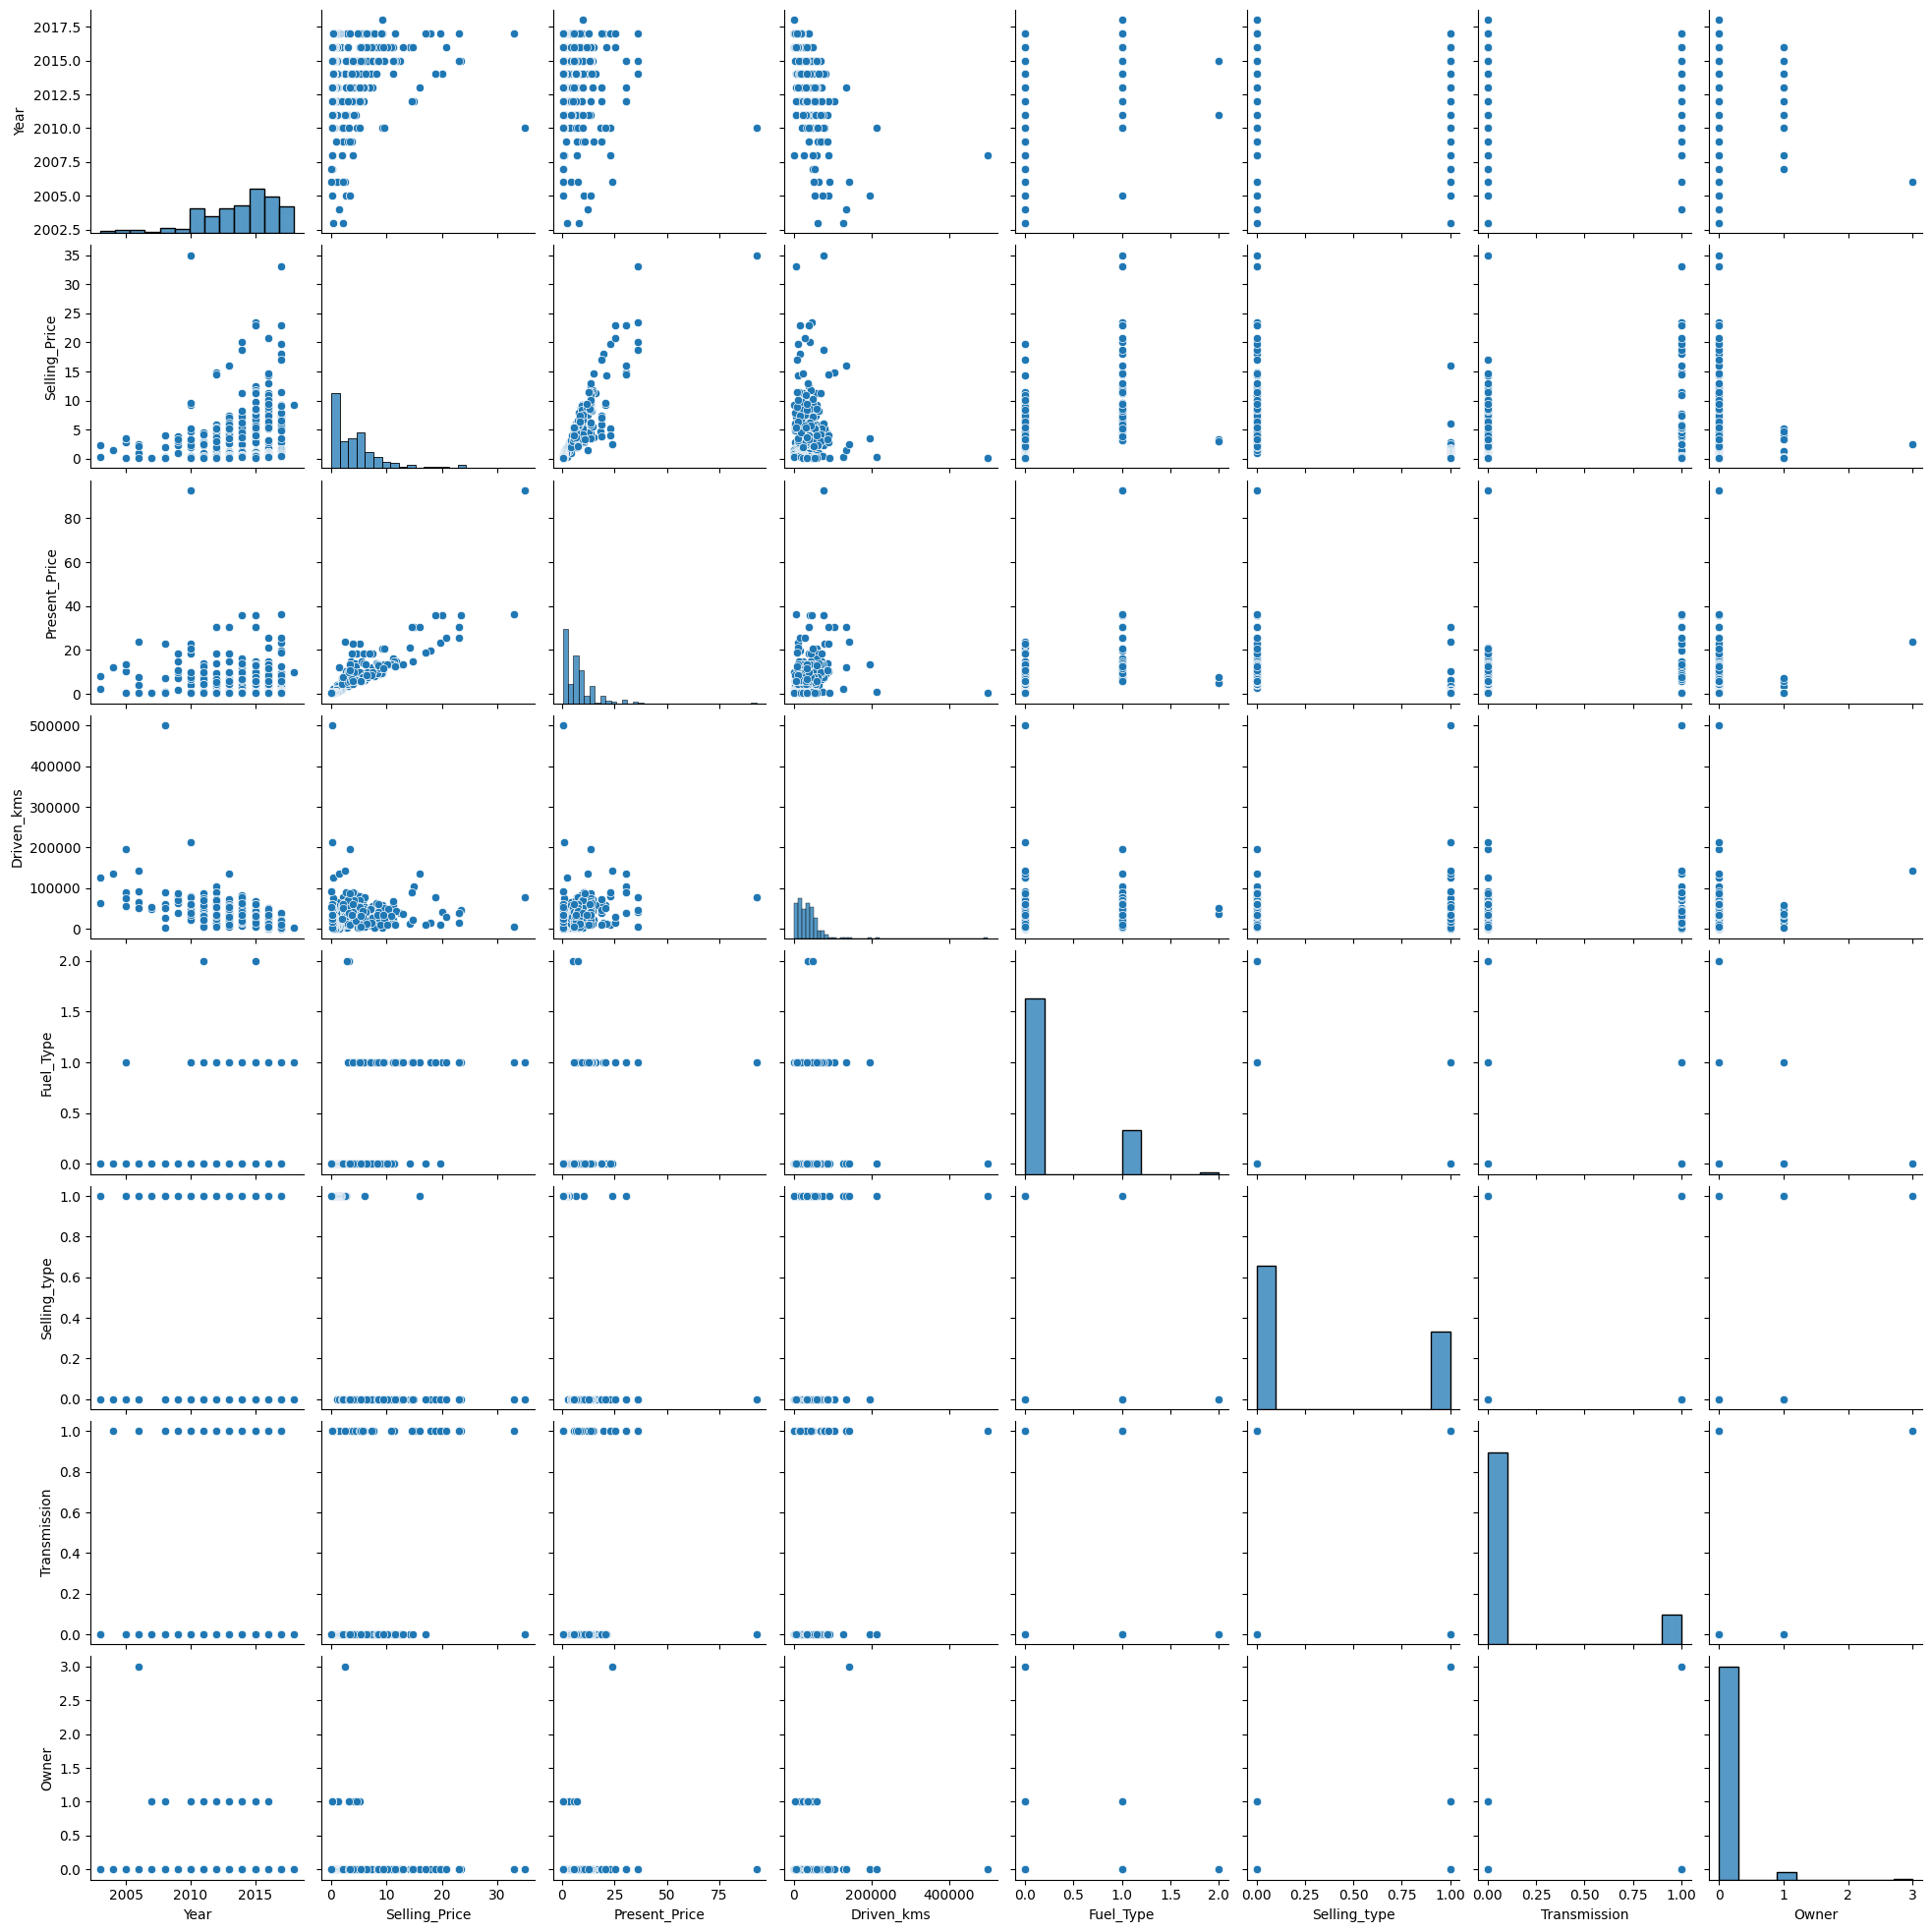

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(d)
plt.show()

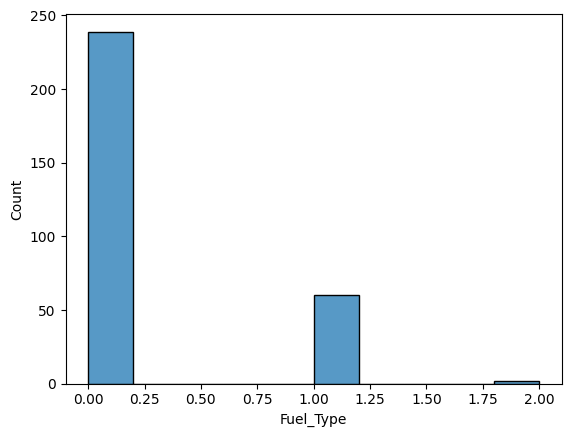

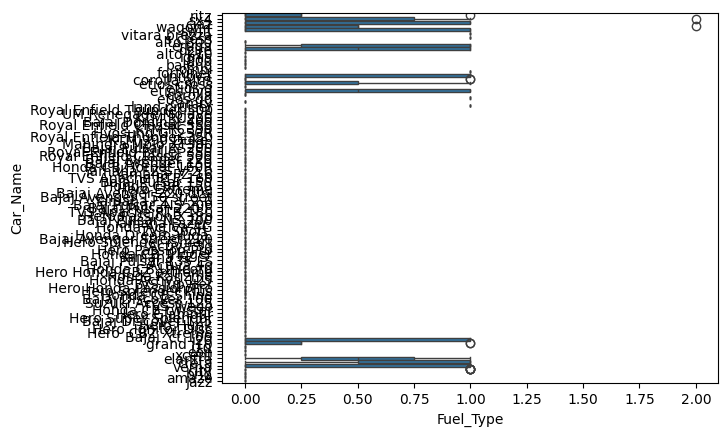

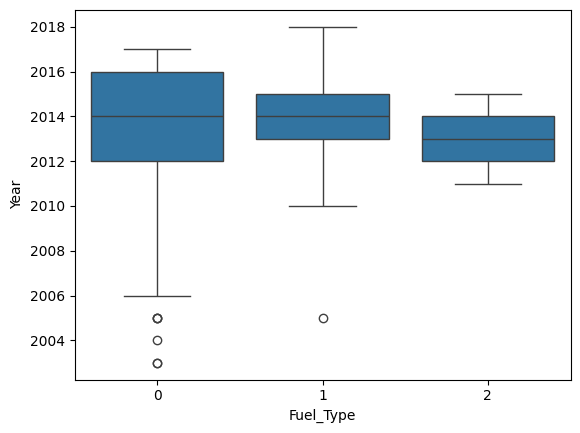

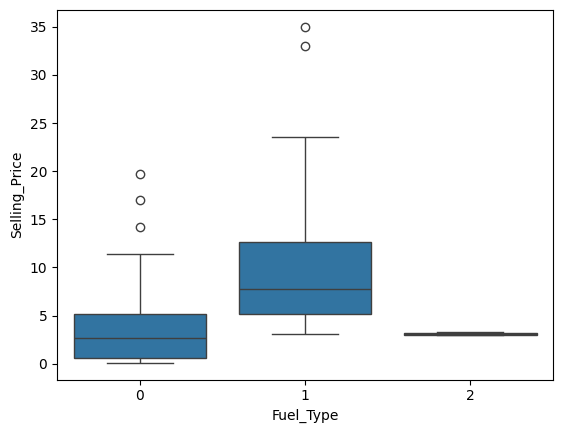

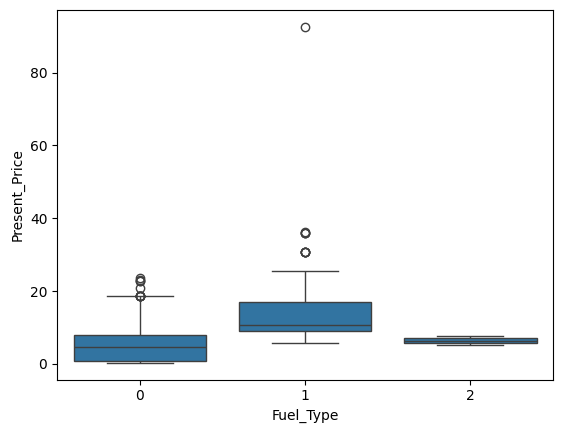

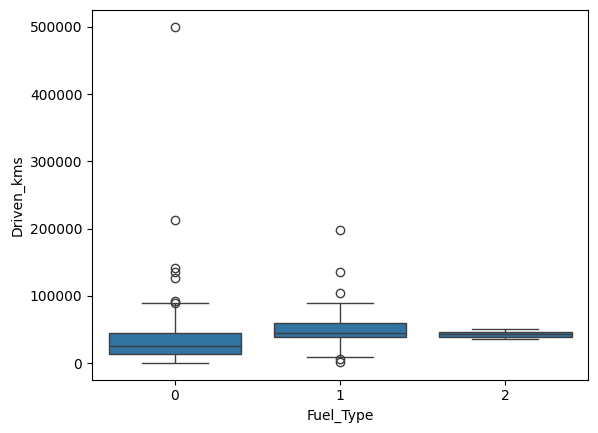

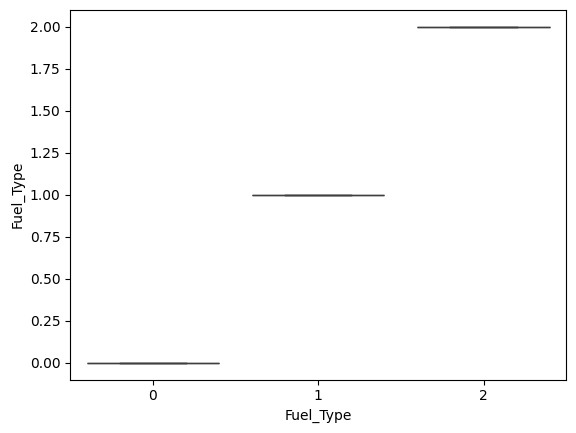

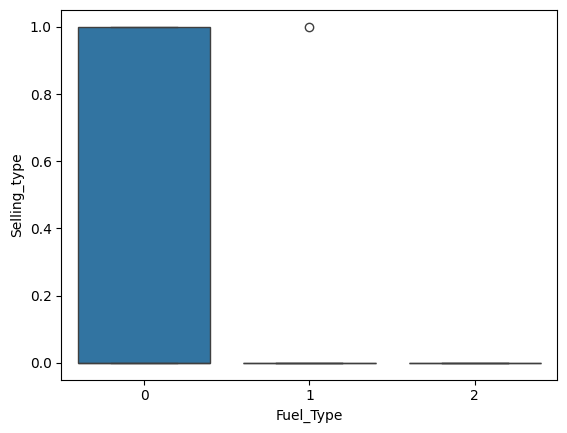

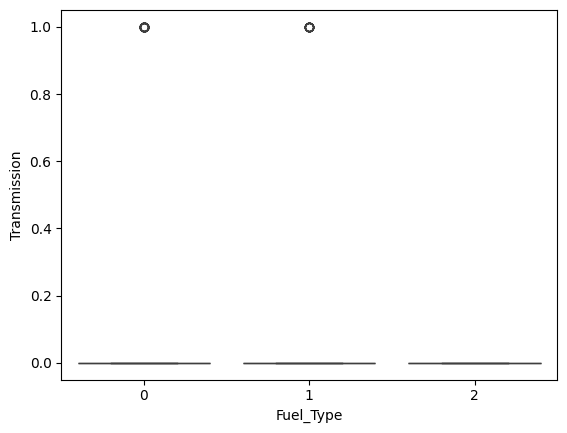

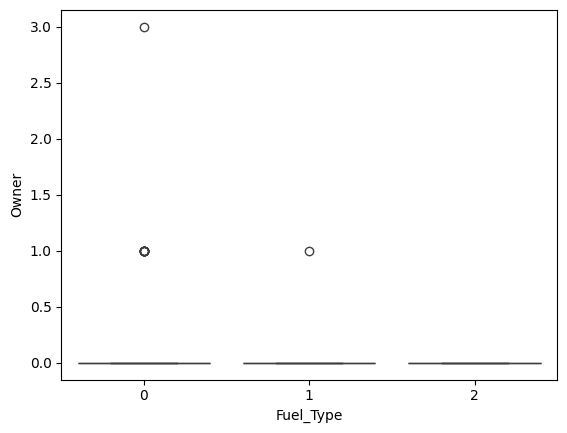

In [6]:
sns.histplot(d['Fuel_Type'])
plt.show()
for column in d.columns[:10]:
    sns.boxplot(x='Fuel_Type', y=column, data=d)
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8360655737704918


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)




Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        46
           1       0.58      0.47      0.52        15

    accuracy                           0.79        61
   macro avg       0.71      0.68      0.69        61
weighted avg       0.77      0.79      0.78        61



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[43  3]
 [ 7  8]]


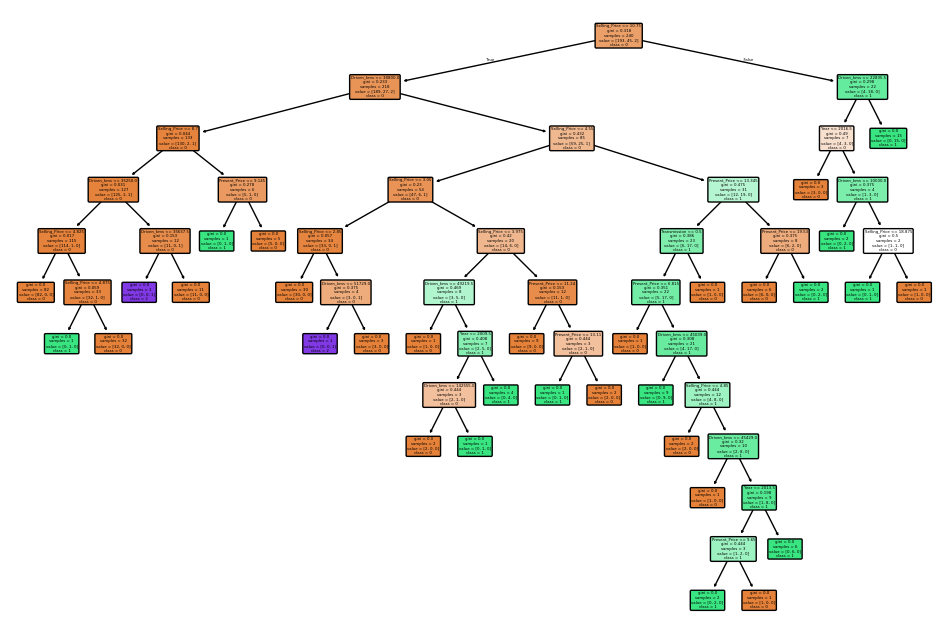

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = [str(cls) for cls in model.classes_]

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=x.columns, class_names=class_names, filled=True, rounded=True)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


In [15]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print()
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ..........C=1, 